# Random Forest Classification of protein-kinase cancer links

TODO -- short description.

This notebook uses the new *KcetRandomForest* class.

In [1]:
import pandas as pd
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
from kcet import KcetDatasetGenerator, KcetRandomForest

## Obtaining the input data
The concept vectors are available from a zenodo repository: https://zenodo.org/record/5329035 Download the five files to a local directory and enter the path of this directory in the following input dialog

- embedding_SG_dim100_upto2010.npy
- embedding_SG_dim100_upto2020.npy
- words_SG_upto2010.txt
- words_SG_upto2020.txt
- clinical_trials_by_phase.tsv

In [2]:
ctfile = input()

/Users/robinp/Documents/data/pubmed2vec/clinical_trials_by_phase.tsv


In [3]:
embeddings = input()

/Users/robinp/Documents/data/pubmed2vec/embedding_SG_dim100_upto2010.npy


In [4]:
words = input()

/Users/robinp/Documents/data/pubmed2vec/words_SG_upto2010.txt


In [5]:
datagen = KcetDatasetGenerator(clinical_trials=ctfile)

[INFO] Reading protein kinase information from /Users/robinp/GIT/KCET/input/prot_kinase.tsv
[INFO] ingested symbol_to_id_map with 522 entries such as {'NCBIGene:2870': 'GRK6'}
[INFO] Ingested mesh_id list with 698 entries such as 'meshd000008' and 'meshd000069293', 
[INFO] Ingested _meshid2disease_map with 698 entries
[INFO] Ingested meshid2disease_map with 514 entries
[INFO] Ingested pki_to_kinase with 76 entries
[INFO] Parsed data for 70 medications.


In [6]:
targetyear = 2010
krf = KcetRandomForest(data_gen=datagen, target=targetyear, embedddingfile=embeddings, wordsfile=words)


[INFO] We ingested 195088 labeled word vectors from /Users/robinp/Documents/data/pubmed2vec/embedding_SG_dim100_upto2010.npy and /Users/robinp/Documents/data/pubmed2vec/words_SG_upto2010.txt
[INFO] We ingested 522 symbol/NCBI gene id mappings from /Users/robinp/GIT/KCET/input/prot_kinase.tsv
[INFO] We ingested 698 meshId/disease mappings from /Users/robinp/GIT/KCET/input/neoplasms_labels.tsv



In [7]:
num_years = 1
midyear = 2014
y_pred, yproba = krf.classify(num_years_later=num_years, mid_year=midyear)

[INFO] We generated a negative training set with 1350 examples (the positive set has 4087)
[INFO] We generated a negative validation set with 1350 examples (the positive set has 4087)
[INFO] Extracted 132 kinase-cancer difference vectors
[INFO]	Initial data: 161 examples
[INFO]	Could not identify 1 gene ids
[INFO]	Could not identify 0 MeSH ids
[INFO] Extracted 1149 kinase-cancer difference vectors
[INFO]	Initial data: 1350 examples
[INFO]	Could not identify 37 gene ids
[INFO]	Could not identify 46 MeSH ids
[INFO] Extracted 1282 kinase-cancer difference vectors
[INFO]	Initial data: 1349 examples
[INFO]	Could not identify 2 gene ids
[INFO]	Could not identify 11 MeSH ids
[INFO] Extracted 1139 kinase-cancer difference vectors
[INFO]	Initial data: 1350 examples
[INFO]	Could not identify 40 gene ids
[INFO]	Could not identify 44 MeSH ids
Setting up RF classification with pos train: 132, neg train 1149, pos validation 1282, neg validation 1139
pos train vectors shape (132, 100)
neg train vecto

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import matplotlib
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import precision_score, recall_score


[INFO] We ingested 195088 labeled word vectors from /Users/robinp/Documents/data/pubmed2vec/embedding_SG_dim100_upto2010.npy and /Users/robinp/Documents/data/pubmed2vec/words_SG_upto2010.txt
[INFO] We ingested 522 symbol/NCBI gene id mappings from /Users/robinp/GIT/KCET/input/prot_kinase.tsv
[INFO] We ingested 698 meshId/disease mappings from /Users/robinp/GIT/KCET/input/neoplasms_labels.tsv

In loop with num_years_later= 0
[INFO] We generated a negative training set with 1350 examples (the positive set has 4087)
[INFO] We generated a negative validation set with 1350 examples (the positive set has 4087)
[INFO] Extracted 132 kinase-cancer difference vectors
[INFO]	Initial data: 161 examples
[INFO]	Could not identify 1 gene ids
[INFO]	Could not identify 0 MeSH ids
[INFO] Extracted 1149 kinase-cancer difference vectors
[INFO]	Initial data: 1350 examples
[INFO]	Could not identify 40 gene ids
[INFO]	Could not identify 48 MeSH ids
[INFO] Extracted 309 kinase-cancer difference vectors
[INFO

NameError: name 'y_test' is not defined

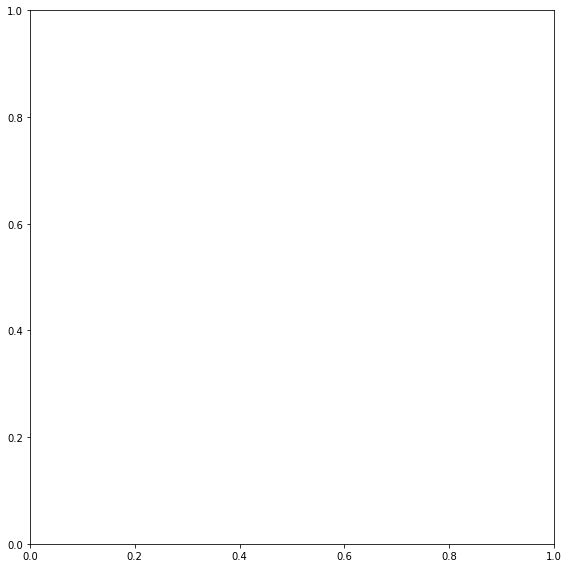

In [9]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)
fig.tight_layout()
font = {'family' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

target_year = 2010
midyear= 2011 

krf = KcetRandomForest(data_gen=datagen, target=targetyear, embedddingfile=embeddings, wordsfile=words)

for num_years_later in [0,1,2,3,4,5,6,7,8,9]:
    print("In loop with num_years_later=",num_years_later)
    y_pred, yproba = krf.classify(num_years_later=num_years_later, mid_year=midyear)
    print("ypred=", y_pred)
    print("yproa=", yproba)
    fpr, tpr, thresholds_auc = roc_curve(y_test,  yproba)
    #gmeans = sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    #ix_gmeans = argmax(gmeans)
   # print('Best Threshold=%.5f, G-Mean=%.3f' % (thresholds_auc[ix_gmeans], gmeans[ix_gmeans]))
    
    
    print(metrics.confusion_matrix(y_test,y_pred))
    auc_roc = roc_auc_score(y_test, yproba)
    
    
    ax1.plot(fpr, tpr, label='%d-%d (%0.2f), n=%d' %(mid_year, mid_year + num_years_later  ,auc_roc, diff_vectors_pos_validation.shape[0]))
    #ax1.scatter(fpr[ix_gmeans], tpr[ix_gmeans], marker='o', color='black')
    
        
        
    precision, recall, thresholds_pr = precision_recall_curve(y_test, yproba)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    #print("precision", precision, 'recall', recall)
    diff_threshold = 0.01
    for i in range(len(fscore)):
        if abs(recall[i] - 0.5 * precision[i]) < diff_threshold:
            print(precision[i],recall[i])
            break
    # locate the index of the largest f score
    #ix_fscore = argmax(fscore)
    ix_fscore = i
    print(' Threshold=%.5f, F-Score=%.2f' % (thresholds_pr[ix_fscore], fscore[ix_fscore]))
    precision_at_threshold = precision_score(y_test, y_pred > thresholds_pr[ix_fscore])
    recall_at_threshold = recall_score(y_test, y_pred > thresholds_pr[ix_fscore])
    print('precision=%.2f, recall=%.2f\n\n' % (precision_at_threshold, recall_at_threshold))
    
    #ax2.plot(recall, precision, label='%d year(s) after %d, precision-recall (area = %0.2f)' % (num_years_later,target_year, auc_recall_precision))
    ax1.set_title('Target year = {}'.format(target_year))
    ax1.set_xlabel('1-Specificity')
    ax1.set_ylabel('Sensitivity')
    ax1.legend(loc="lower right")
    
plt.show()

    